# Fill That Cart!
## Introduction

Instacart is a grocery delivery platform where customers can place orders and have them delivered, similar to Uber Eats or DoorDash. The dataset provided here is a modified version of the original. Its size was reduced to speed up computations, and missing values and duplicates were intentionally introduced. Care was taken to preserve the original data distributions when making these changes.

# Data Dictionary

The dataset contains five tables. <br>
Below is a data dictionary listing each table’s columns and describing the data they contain.
instacart_orders.csv: Each row corresponds to an order placed through the Instacart app.

- `instacart_orders.csv`
    - `'order_id'`: unique ID number identifying each order.
    - `'user_id'`: unique ID number identifying each customer account.
    - `'order_number'`: the number of times this customer has placed an order.
    - `'order_dow'`: day of the week the order was placed (0 = Sunday).
    - `'order_hour_of_day'`: hour of the day the order was placed.
    - `'days_since_prior_order'`: number of days since this customer’s previous order.
- `products.csv`
    - `'product_id'`: unique ID number identifying each product.
    - `'product_name'`: name of the product.
    - `'aisle_id'`: unique ID number identifying each grocery aisle category.
    - `'department_id'`: unique ID number identifying each grocery department.
- `order_products.csv` 
    - `'order_id'`: unique ID number identifying each order.
    - `'product_id'`: unique ID number identifying each product.
    - `'add_to_cart_order'`: sequential order in which each item was added to the cart.
    - `'reordered'`: 0 if the customer has never ordered this product before, 1 if they have.
- `aisles.csv`
    - `'aisle_id'`: unique ID number identifying each grocery aisle category.
    - `'aisle'`: name of the aisle.
- `departments.csv`
    - `'department_id'`: unique ID number identifying each grocery department.
    - `'department'`: name of the department.

# 1. Inicialization

In [1]:
# Import functions
import sys
import os

sys.path.append(os.path.abspath('..'))

In [2]:
# import libraries: 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from src.null_columns import show_null_columns
from src.duplicate_names import check_duplicate_names

In [3]:
# Extract the info from the Datasets
"""
The .csv files are separated by (;)
"""

#df_instacart_orders = pd.read_csv('../data/raw/instacart_orders.csv', sep= ';')
#df_products = pd.read_csv('../data/raw/products.csv', sep= ';')
#df_aisles = pd.read_csv('../data/raw/aisles.csv', sep= ';')
#df_departments = pd.read_csv('../data/raw/departments.csv', sep= ';')
#df_order_products = pd.read_csv('../data/raw/order_products.csv', sep= ';')

df_instacart_orders = pd.read_csv('C:\\Users\\gudia\\Documents\\Doc TripleTen\\Proyectos Sprint\\Sprint_4\\Proyecto\\instacart_orders.csv', sep=';')
df_products = pd.read_csv('C:\\Users\\gudia\\Documents\\Doc TripleTen\\Proyectos Sprint\\Sprint_4\\Proyecto\\products.csv', sep= ';')
df_aisles = pd.read_csv('C:\\Users\\gudia\\Documents\\Doc TripleTen\\Proyectos Sprint\\Sprint_4\\Proyecto\\aisles.csv', sep= ';')
df_departments = pd.read_csv('C:\\Users\\gudia\\Documents\\Doc TripleTen\\Proyectos Sprint\\Sprint_4\\Proyecto\\departments.csv', sep= ';')
df_order_products = pd.read_csv('C:\\Users\\gudia\\Documents\\Doc TripleTen\\Proyectos Sprint\\Sprint_4\\Proyecto\\order_products.csv', sep= ';')


# 2. Data Preprocessing

### 2.1 Copy original Dataframes

In [4]:
# Clone datasets to keep the original with no changes
df_instacart_orders_clean = df_instacart_orders.copy()
df_products_clean = df_products.copy()
df_aisles_clean = df_aisles.copy()
df_departments_clean = df_departments.copy()
df_order_products_clean = df_order_products.copy()

### 2.2 Reviewing duplicate / null values

#### 2.2.1 Dataframe Instacard Orders

In [5]:
# General View
df_instacart_orders.info()
print()
print(df_instacart_orders.sample(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
431447   1572104   132829            15          4                 16   
436367   1693679   179732            49          0                 10   
405050   2542998   176559             3          3                 15   

        days_since_prior_order  
431447                     2.0  
436367                     3.0  
405050        

Duplicated Values

In [6]:
print("the duplicate rows are:", df_instacart_orders_clean.duplicated().sum())  # Sum of Duplicated rows
print() 
print(df_instacart_orders_clean[df_instacart_orders_clean.duplicated()])        # printing duplicated rows
print()
print(df_instacart_orders_clean[df_instacart_orders_clean['order_id'].duplicated()])   # Reviewing duplicated id's

"""
Findings: 
Printing the results, there is a pattern: 
order_dow: 3, where 0 (according to the description) represents Sunday. Therefore, the repeated value across all duplicate rows corresponds to Wednesday.
order_hour_of_day: 2, following the 24-hour format starting at 0 (midnight), which means 2 a.m.
We will proceed to eliminate these duplicated rows, to keep the dataset integrity and to avoid "noise" in further analysis.
"""
# Eliminate duplicate values
df_instacart_orders_clean = df_instacart_orders_clean.drop_duplicates()
df_instacart_orders_clean.reset_index(drop=True)

print('number of duplicated rows at the end: ', df_instacart_orders_clean.duplicated().sum())  # Verify duplicated rows
print('number of duplicate values in column "order_id": ', df_instacart_orders_clean['order_id'].duplicated().sum()) # Verify duplicated id's

the duplicate rows are: 15

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   1832

Null Values

In [7]:
show_null_columns(df_instacart_orders_clean, "Instacard Orders")


Null values in Instacard Orders:
days_since_prior_order    28817
dtype: int64


In [8]:
# Are there any missing values that are not the customer's first order?
order_name_null = df_instacart_orders_clean[df_instacart_orders_clean['days_since_prior_order'].isnull()]
percent_null = df_instacart_orders['days_since_prior_order'].isnull().mean() * 100
print(f"the percent of null values in 'days_since_prior_order' is: {percent_null:.2f}%")
print()
print(order_name_null.head(10))

the percent of null values in 'days_since_prior_order' is: 6.02%

     order_id  user_id  order_number  order_dow  order_hour_of_day  \
28     133707   182261             1          3                 10   
96     787445    25685             1          6                 18   
100    294410   111449             1          0                 19   
103   2869915   123958             1          4                 16   
104   2521921    42286             1          3                 18   
111   2651928   142920             1          0                 14   
118    174214   148907             1          1                  8   
147   2439694    99710             1          6                 10   
157   1330993   138895             1          4                  6   
158   2835610   195350             1          6                 19   

     days_since_prior_order  
28                      NaN  
96                      NaN  
100                     NaN  
103                     NaN  
104          

Findings: <br>
The null values in column 'days_since_prior_order' are directly related to the number or orders (1) in column 'order_number', meaning no previous
orders added, as it represents the first order.  So null values have an important impact in the dataset. Keeping them is the right path. 

#### 2.2.2 Dataframe Products

In [9]:
# General View
df_products.info()
print()
print(df_products.sample(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB

       product_id                  product_name  aisle_id  department_id
45317       45318          Onion Flavored Rings       107             19
22268       22269          Protein Coffee Shake        31              7
5568         5569  White Cran-Peach Juice Drink        98              7


Duplicated Values

In [10]:
print(f"the duplicate rows are: {df_products_clean.duplicated().sum()}")  # Sum of Duplicated rows
print('the number of duplicated values in "product_id" is: ', df_products_clean['product_id'].duplicated().sum())  # Duplicates in "product_id"

"""
Findings:
When analyzing the products.csv dataset, I first checked whether there were any duplicate rows. In this case, there were none.
I then verified the “product_id” column and found no duplicate values. 
However, in the “product_name” column, there could be hidden implicit duplicates. To address this, I converted all product names to lowercase for better comparison.
"""
    # Changing to lowercase column "product name"
df_products_clean['product_name'] = df_products_clean['product_name'].str.lower() 
print('the number of duplicated name orders is: ', df_products_clean['product_name'].duplicated().sum())
print()

the duplicate rows are: 0
the number of duplicated values in "product_id" is:  0
the number of duplicated name orders is:  1361



In [11]:
# Review if there's a duplicated not null product names
check_duplicate_names(df_products_clean, 'product_name')

Number of non-null values in 'product_name': 48436
The number of duplicated non-null 'product_name' values: 104


np.int64(104)

Null Values

In [12]:
show_null_columns(df_products_clean, "Products")
print()

# Review null values in the dataset
product_name_null = df_products_clean[df_products_clean['product_name'].isnull()]
print(product_name_null.sample(5))


Null values in Products:
product_name    1258
dtype: int64

       product_id product_name  aisle_id  department_id
47410       47411          NaN       100             21
490           491          NaN       100             21
45020       45021          NaN       100             21
40765       40766          NaN       100             21
18055       18056          NaN       100             21


In [13]:
# Are all missing product names related to the aisle with ID 100?
product_name_null_aisle_100 = product_name_null[product_name_null['aisle_id'] == 100]
all_aisle_100 = (product_name_null['aisle_id'] == 100).all()
print(f"Are all products without a name in aisle 100? {all_aisle_100}")

# Are all missing product names related to the department with ID 21?
product_name_null_department_21 = product_name_null[product_name_null['department_id'] == 21]
all_department_21 = (product_name_null['department_id'] == 21).all()
print(f"Are all products without a name in department 21? {all_department_21}")
print()

# Use the department and aisle tables to review the data for aisle ID 100 and department ID 21.
tables_department_aisle = df_products_clean[(df_products_clean['aisle_id'] == 100) & (df_products_clean['department_id'] == 21)]
print(tables_department_aisle.head())

Are all products without a name in aisle 100? True
Are all products without a name in department 21? True

     product_id product_name  aisle_id  department_id
37           38          NaN       100             21
71           72          NaN       100             21
109         110          NaN       100             21
296         297          NaN       100             21
416         417          NaN       100             21


Findings: <br>
Reviewing the list, these could correspond to non-existent aisles and/or departments, since none of the rows contain information in "product_name." Alternatively, it may simply be that for that aisle and/or department, there is no "product_name" information available.

In [24]:
# fill missing product names with 'Unknown'
df_products_clean['product_name'].fillna('Unknown', inplace=True)

Findings <br>
Here are the results for the “product_id” column: <br>
- Number of duplicate product names: 1,361
- Number of null product names: 1,258
- Number of products with names: 48,436
- Number of duplicate names among non-null products: 104 <br>

When exploring the null data, I noticed a pattern where “aisle_id” = 100 and “department_id” = 21. <br>
I reviewed random samples (sample), and in all cases, the same pattern was repeated.

#### 2.2.3 Dataframe Aisles

In [25]:
# General View
df_aisles.info()
print()
print(df_aisles.sample(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB

     aisle_id                       aisle
104       105  doughs gelatins bake mixes
78         79                frozen pizza
103       104           spices seasonings


Duplicated Values

In [26]:
print('the number of duplicated rows is: ', df_aisles_clean.duplicated().sum())                    # Review duplicated Rows
print('the number of department aisle IDs is: ', df_aisles_clean['aisle_id'].duplicated().sum())   # Review duplicity in column 'aisle_id'
print()

# Review if there's a duplicated not null aisle
check_duplicate_names(df_aisles_clean, 'aisle')

the number of duplicated rows is:  0
the number of department aisle IDs is:  0

Number of non-null values in 'aisle': 134
The number of duplicated non-null 'aisle' values: 0


np.int64(0)

Null Values

In [34]:
show_null_columns(df_aisles_clean, "Aisles")


Null values in Aisles:
No null values found.


#### 2.2.4 Dataframe Departments 

In [35]:
# General View
df_departments.info()
print()
print(df_departments.sample(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes

    department_id department
19             20       deli
3               4    produce
1               2      other


Duplicated Values

In [36]:
print('the number of duplicated rows is: ', df_departments_clean.duplicated().sum())  # Duplicated rows
print('the number of department duplicated IDs is: ', df_departments_clean['department_id'].duplicated().sum()) # Duplicated in column "department_id"

# Review if there's a duplicated not null aisle
check_duplicate_names(df_departments_clean, 'department')

the number of duplicated rows is:  0
the number of department duplicated IDs is:  0
Number of non-null values in 'department': 21
The number of duplicated non-null 'department' values: 0


np.int64(0)

Null Values

In [37]:
show_null_columns(df_departments_clean, "Departments")


Null values in Departments:
No null values found.


#### 2.2.5 Dataframe Order Products

In [38]:
# General View
df_order_products.info()
print()
print(df_order_products.sample(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB

         order_id  product_id  add_to_cart_order  reordered
1162536   1709766        1185               18.0          1
1409655    891238       21969                4.0          0
4340658   1148291       47591                1.0          1


Duplicated Values

In [51]:
print('The number of duplicated rows is: ', df_order_products_clean.duplicated().sum())

# Here we check for duplicates by combining the columns "add_to_cart_order" and "order_id"
duplicates_cart_orderid = df_order_products_clean.duplicated(subset=['add_to_cart_order', 'order_id']).sum()
print('The number of duplicates combining columns "add_to_cart_order" and "order_id" is: ', duplicates_cart_orderid)

# Here we check for duplicates by combining the columns "order_id", "product_id", and "add_to_cart_order"
duplicates_order_product_cart = df_order_products_clean.duplicated(subset=['order_id', 'product_id', 'add_to_cart_order']).sum()
print('The number of duplicates combining columns "order_id", "product_id", and "add_to_cart_order" is: ', duplicates_order_product_cart)

The number of duplicated rows is:  0
The number of duplicates combining columns "add_to_cart_order" and "order_id" is:  766
The number of duplicates combining columns "order_id", "product_id", and "add_to_cart_order" is:  0


Findings: <br>
We started by checking whether there were any completely duplicated rows and confirmed that none existed.

To detect any misleading or inconsistent data, I began by combining the unique order number “order_id” with the sequential order “add_to_cart_order.” This seemed like a good starting point, as this combination implies that within the same unique order, each product added to the cart should have a unique sequence number.

After exploring the analysis further, I concluded that it was worthwhile to include the “product_id” column in the combination, as it helps determine whether the same product appears more than once with the same sequence number within a single order.

Null Values

In [52]:
show_null_columns(df_order_products_clean, "Order Products")


Null values in Order Products:
add_to_cart_order    836
dtype: int64


In [54]:
# What are the minimum and maximum values in this column?
print(f"The minimum value of the 'add_to_cart_order' column is: {df_order_products_clean['add_to_cart_order'].min()}")
print(f"The maximum value of the 'add_to_cart_order' column is: {df_order_products_clean['add_to_cart_order'].max()}")
print()

"""
Findings
The reason to calculate min/max values in the column with null values, is to make sure the null values are pertaining to null values, and not zeros.
In this case, there are no zero values — those could be interpreted as null values.
"""

# Save all order IDs that have a missing value in 'add_to_cart_order'
cart_null_values = df_order_products_clean[df_order_products_clean['add_to_cart_order'].isnull()]['order_id'].unique()
print(cart_null_values)
print()

#Count the number of 'product_id' in each order and check the minimum count value.
filtered_order_products = df_order_products_clean[df_order_products_clean['order_id'].isin(cart_null_values)]
product_counts_per_order = filtered_order_products.groupby('order_id').size()
print(f"The minimum value in the 'add_to_cart_order' column is: {product_counts_per_order.min()}")


The minimum value of the 'add_to_cart_order' column is: 1.0
The maximum value of the 'add_to_cart_order' column is: 64.0

[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]

The minimum value in the 'add_to_cart_order' column is: 65


Findings <br>
In this case, all orders with missing values do indeed have more than 64 items. Using groupby, all orders with missing data were grouped by their order_id. Finally, I calculated the min and max values to verify the range of orders.

In [55]:
# Replace the missing values in the 'add_to_cart_order' column with 999 and convert the column to integer type.
df_order_products_clean['add_to_cart_order'] = df_order_products_clean['add_to_cart_order'].fillna(999).astype(int)
df_order_products_clean.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB


Findings <br>
After carrying out the data filtering process to identify missing or null values and duplicates (making sure to distinguish real duplicates from “false duplicates”), the dataset was successfully cleaned and prepared for analysis. <br>
During the data cleaning process, specific patterns were observed — for example, in instacart_orders, duplicate data appeared in aisle 100 and department 21; and in order_products, the null values showed a pattern related to the number of products per order.

# 3. Data Visualization
Now that the data is processed and ready, here comes the following analysis:

## [A] Initial Checks
Verifying the values in the columns 'order_hour_of_day' and 'order_dow' in the orders table are reasonable <br>
(i.e., 'order_hour_of_day' ranges between 0 and 23, and 'order_dow' ranges between 0 and 6).
- Creating a chart showing the number of people placing orders depending on the time of day.
- Creating a chart showing which day of the week people make their purchases.
- Creating a chart showing how long people wait before placing their next order, and comment on the minimum and maximum values.

### [A1] Verify sensitive values

In [58]:
hours_day = np.sort(df_instacart_orders_clean['order_hour_of_day'].unique())
day_week = np.sort(df_instacart_orders_clean['order_dow'].unique())
print('The hours of the day in the column "order_hour_of_day" are:', hours_day)
print('The days of the week in column "order_dow" are:', day_week)

The hours of the day in the column "order_hour_of_day" are: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
The days of the week in column "order_dow" are: [0 1 2 3 4 5 6]


Findings: <br>
Indeed, both "order_hour_of_day" and "order_dow" are sensitive values. They fluctuate within their expected patterns.

### [A2] For each hour of the day, how many people place orders?

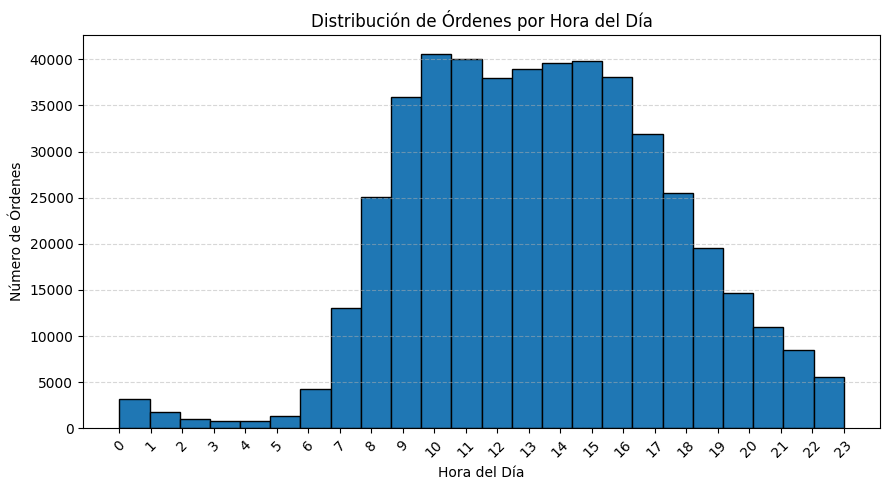

In [60]:
plt.figure(figsize=(9, 5))
plt.hist(df_instacart_orders_clean['order_hour_of_day'], bins=24, edgecolor='black')
plt.title("Distribución de Órdenes por Hora del Día")
plt.xlabel("Hora del Día")
plt.ylabel("Número de Órdenes")
plt.xticks(range(24), rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Findings: <br>
To create the chart, I first had to group the data from the columns "order_hour_of_day" and "order_id" using groupby. This allowed me to obtain the total number of orders placed per hour across the 24-hour range represented in the "order_hour_of_day" column.
The x-axis represents the hours, and the y-axis represents the number of orders. I used a histogram because it is visually appealing and easy to understand.

### [A3] On which day of the week do people buy groceries?

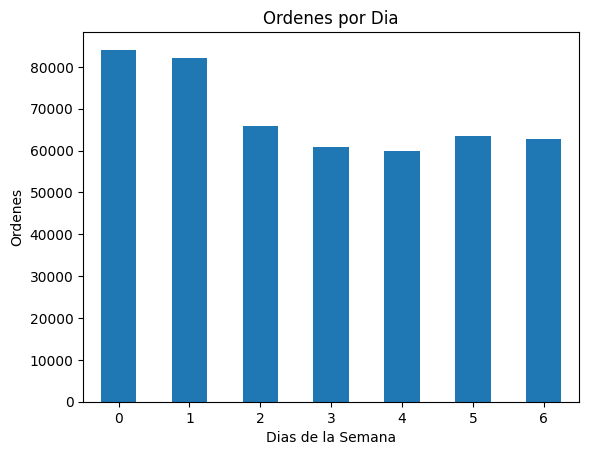

In [61]:
orders_per_day = df_instacart_orders_clean.groupby('order_dow')['order_id'].count()
orders_per_day = orders_per_day.sort_index()

orders_per_day.plot(
    title= "Ordenes por Dia",
    kind= 'bar',
    x= 'order_dow',
    y= 'order_id',
    xlabel= 'Dias de la Semana',
    ylabel= 'Ordenes',
    rot= 0
)

plt.show()

Findings: <br>
To create the chart, I first had to group the data from the columns "order_dow" and "order_id" using groupby. This allowed me to obtain the total number of orders placed per day, within the 24-hour range represented in the "order_hour_of_day" column.
The x-axis represents the days, and the y-axis represents the number of orders. I used a bar chart because it is visually appealing and easy to understand.

### [A4] How long do people wait before placing another order?

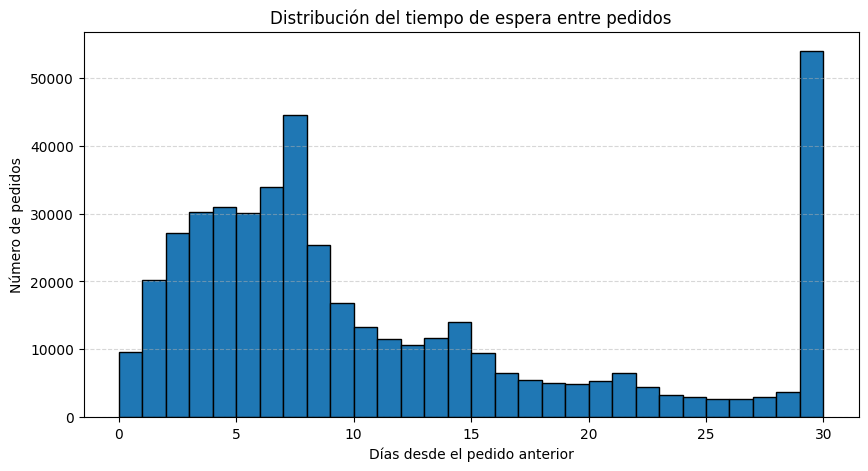

In [62]:
plt.figure(figsize=(10, 5))
plt.hist(df_instacart_orders_clean['days_since_prior_order'], bins=30, edgecolor='black')
plt.title('Distribución del tiempo de espera entre pedidos')
plt.xlabel('Días desde el pedido anterior')
plt.ylabel('Número de pedidos')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Findings: <br>
We can clearly see a distinction between customers who shop very frequently—those close to 0 days since their last purchase—and those who wait up to 30 days before ordering again.
There is a slight upward trend between days 0 and 8, after which the graph shows a steady decline up to day 30.
This could indicate that Instacart customers tend to fall into two main groups: those who purchase very regularly and those who wait around 30 days before making another order.

## [B] Next Steps

Is there any difference between the ‘order_hour_of_day’ distributions for Wednesdays and Saturdays? Plot bar charts of ‘order_hour_of_day’ for both days in the same figure and describe any differences you observe. <br>
Plot the distribution for the number of orders placed by customers (that is, how many customers made only 1 order, how many made 2, 3, and so on). <br>
<br>
Which are the top 20 most frequently ordered products (show their IDs and names)?

### [B1] Difference between Wednesdays and Saturdays for ‘order_hour_of_day’.

In [69]:
# Wednesday orders
wednesday = df_instacart_orders_clean[df_instacart_orders_clean['order_dow'] == 3] 
wednesday_hrs = wednesday['order_hour_of_day'].value_counts()

# Saturday orders
saturday = df_instacart_orders_clean[df_instacart_orders_clean['order_dow'] == 6]
saturday_hrs = saturday['order_hour_of_day'].value_counts()

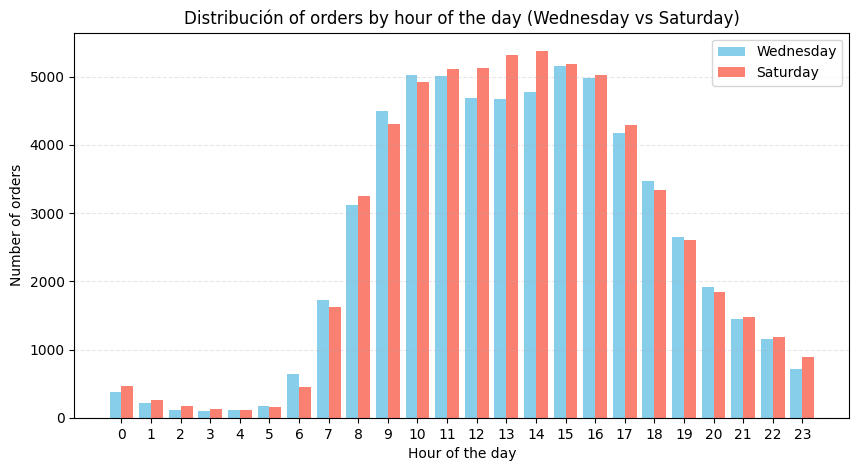

In [70]:
plt.figure(figsize=(10,5))
plt.bar(wednesday_hrs.index - 0.2, wednesday_hrs.values, width=0.4, label='Wednesday', color='skyblue')
plt.bar(saturday_hrs.index + 0.2, saturday_hrs.values, width=0.4, label='Saturday', color='salmon')
plt.xlabel('Hour of the day')
plt.ylabel('Number of orders')
plt.title('Distribución of orders by hour of the day (Wednesday vs Saturday)')
plt.xticks(range(24))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

Findings: <br>
For the final histogram comparing orders by hour between Wednesday and Saturday, we can observe a strong similarity in the hourly patterns. Analyzing by hour, there is a clear peak between 10 AM and 4 PM on both days. Both the high-activity periods and the low-order moments are quite similar for both days.

### [B2] What is the distribution of the number of orders per customer?

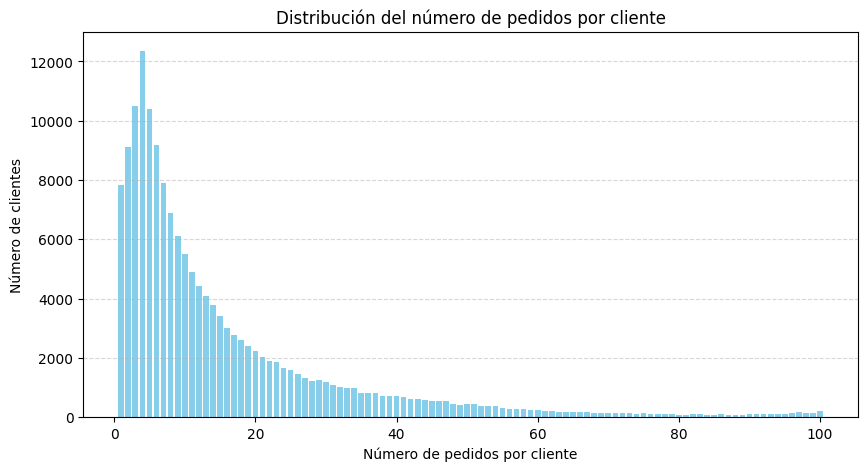

In [72]:
orders_by_user = df_instacart_orders_clean.groupby('user_id')['order_number'].max()
distribution = orders_by_user.value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.bar(distribution.index, distribution.values, color='skyblue')
plt.xlabel('Número de pedidos por cliente')
plt.ylabel('Número de clientes')
plt.title('Distribución del número de pedidos por cliente')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Findings: <br>
We can observe a high frequency from orders 1 to 4. From that point onward, the curve tends to decrease, reaching very few orders and remaining low toward the end of the chart. This could indicate that a small number of customers tend to make large purchases, while the highest peaks correspond to customers placing between 1 and 4 orders.

### [B3] Which are the 20 most popular products (show their ID and name)?

In [73]:
# How many times each product_id appears 
popular_products = df_order_products_clean['product_id'].value_counts().head(20)

# Convert the series to Dataframe
popular_products = popular_products.reset_index()
popular_products.columns = ['product_id', 'num_pedidos']

# Merge column "product_id" from dataframes "order_products" and "products"
products_name = pd.merge(popular_products, df_products_clean[['product_id', 'product_name']], on='product_id')
products_name = products_name[['product_id', 'product_name', 'num_pedidos']]

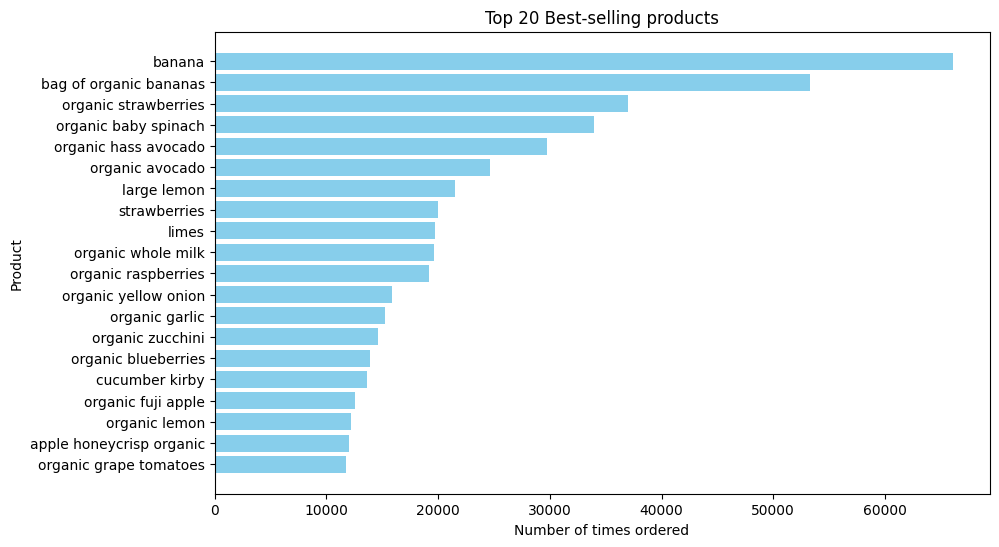

In [75]:
plt.figure(figsize=(10, 6))
plt.barh(products_name['product_name'], products_name['num_pedidos'], color='skyblue')
plt.xlabel('Number of times ordered')
plt.ylabel('Product')
plt.title('Top 20 Best-selling products')
plt.gca().invert_yaxis()
plt.show()

Findings: <br>
For this part, I had to merge the product_id and product_name columns from the "products" dataset with the "instacart_orders" dataset. This allowed me to create a chart showing the top 20 most ordered products. I observed that “Banana” and “Bag of Organic Bananas” stand out with over 40,000 orders each. From 20,000 orders and up, the 11 most requested products are concentrated.

## [C] Last Steps
How many items do people usually buy in one order? What does the distribution look like? <br>
What are the top 20 items that are reordered most frequently (show their product IDs and names)? <br>
For each product, what is the reorder rate (number of reorders / total orders)?<br>
For each customer, what proportion of the products they ordered had already been ordered before? Calculate the reorder rate for each user instead of for each product.<br>
What are the top 20 items people add to their carts first (show the product IDs, names, and the number of times they were the first item added to the cart)?

### [C1] How many items do people usually buy in an order? What does the distribution look like?

In [77]:
articles_per_order = df_order_products_clean.groupby('order_id')['product_id'].count()
print()
print(articles_per_order.describe().round(2))


count    450046.00
mean         10.10
std           7.54
min           1.00
25%           5.00
50%           8.00
75%          14.00
max         127.00
Name: product_id, dtype: float64


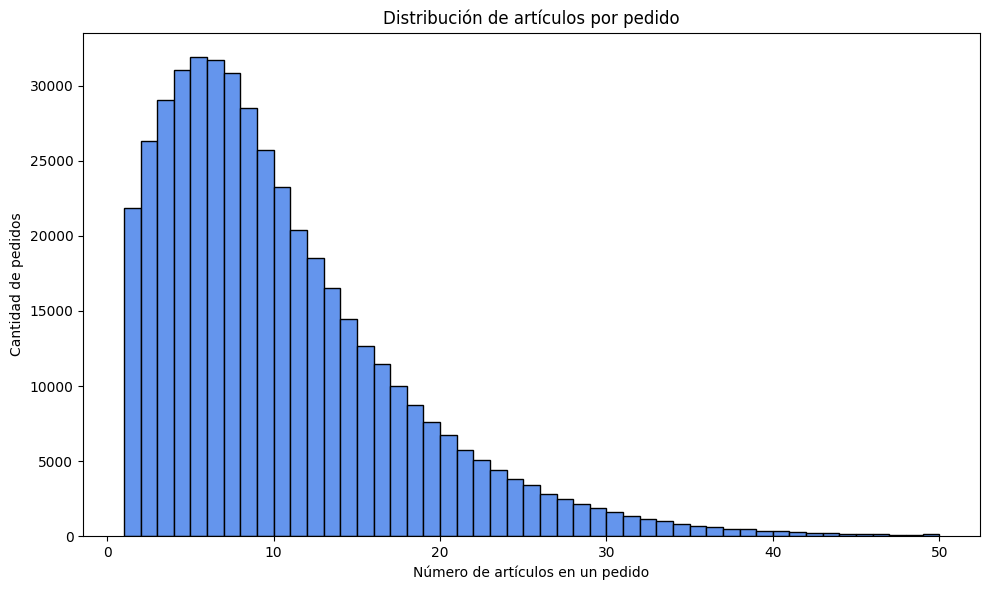

In [78]:
plt.figure(figsize=(10,6))
plt.hist(articles_per_order, bins=range(1, 51), color='cornflowerblue', edgecolor='black')
plt.title('Distribución de artículos por pedido')
plt.xlabel('Número de artículos en un pedido')
plt.ylabel('Cantidad de pedidos')
plt.tight_layout()
plt.show()

Findings: <br>
Given the trend shown in the chart, we can see that the peak occurs within the first five items per order. From there, the curve declines exponentially, stabilizing at minimal values around 40 items. This can be interpreted as a clear distinction between customers who mostly purchase up to five items and those who add more than five to their cart.

### [C2] Which are the top 20 items that are most frequently reordered (show their product names and IDs)?

In [79]:
# Filter by reordered products
popular_products_reordered = df_order_products_clean[df_order_products_clean['reordered'] == 1]

# count how many times appear each product_id
popular_products_reordered = popular_products_reordered['product_id'].value_counts().head(20)

# Convert the series to Dataframe
popular_products_reordered = popular_products_reordered.reset_index()
popular_products_reordered.columns = ['product_id', 'num_reorders']

# do the merge
top_popular_products_reordered = pd.merge(popular_products_reordered, df_products_clean[['product_id', 'product_name']], on='product_id')

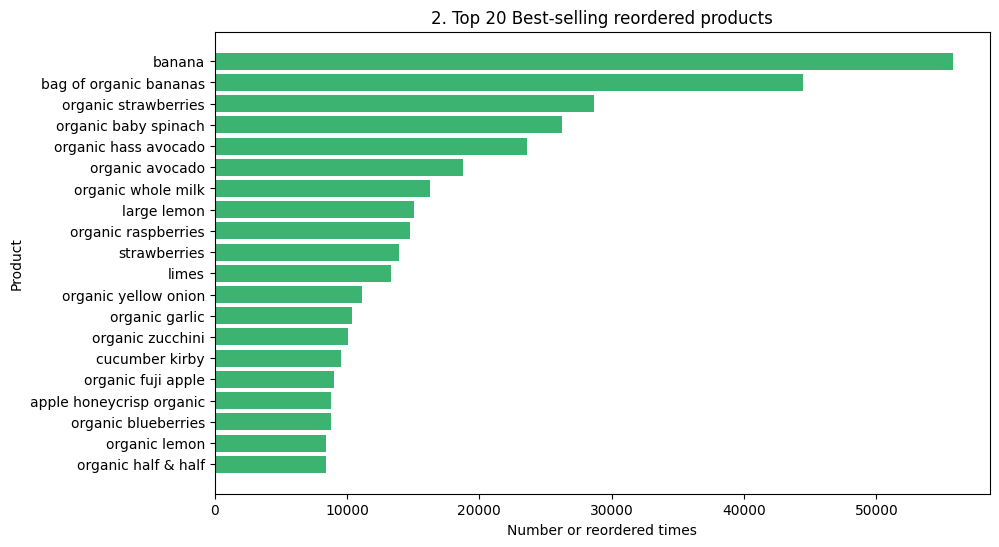

In [81]:
plt.figure(figsize=(10, 6))
plt.barh(top_popular_products_reordered['product_name'], top_popular_products_reordered['num_reorders'], color='mediumseagreen')
plt.title('2. Top 20 Best-selling reordered products')
plt.xlabel('Number or reordered times')
plt.ylabel('Product')
plt.gca().invert_yaxis()
plt.show()

Findings: <br>
Based on the chart, these are products with high customer loyalty. We can point out specific cases that appear in the same positions as in the "Top 20 Most Ordered Products" chart — such as Banana, Bag of Organic Bananas, Organic Strawberries, Organic Baby Spinach, Organic Hass Avocado, and Organic Avocado — which remain customer favorites for both ordering and reordering.

### [C3] For each product, what is the proportion of times it is ordered and then reordered?

In [85]:
# Calculate the repeat rate per product
total_orders = df_order_products_clean.groupby('product_id').size()
total_reorders = df_order_products_clean.groupby('product_id')['reordered'].sum()
product_reorder_rate = (total_reorders / total_orders).reset_index(name='tasa_reorden')

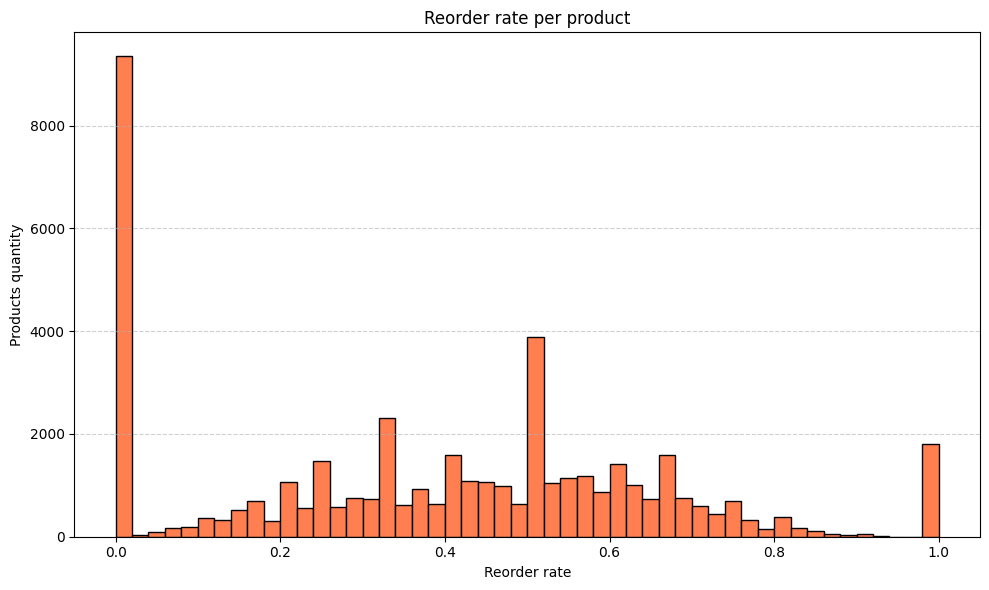

In [86]:
plt.figure(figsize=(10, 6))
plt.hist(product_reorder_rate['tasa_reorden'], bins=50, color='coral', edgecolor='black')
plt.title('Reorder rate per product')
plt.xlabel('Reorder rate')
plt.ylabel('Products quantity')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Findings: <br>
In this case, the reorder rate was calculated per product. It can be said that although many products are ordered only once, there is a small number of items with a very high reorder rate. There is a clear trend among customers not to repeat their purchases.

### [C4] For each customer, what proportion of their ordered products had they already ordered before?

In [87]:
# Merge order_products and orders to get user_id
df_merged = pd.merge(df_order_products_clean, df_instacart_orders_clean[['order_id', 'user_id']], on='order_id')

# Group by user
user_total = df_merged.groupby('user_id')['product_id'].count()
user_reordered = df_merged.groupby('user_id')['reordered'].sum()
reorder_date_per_user = (user_reordered / user_total).reset_index(name='tasa_reorden')

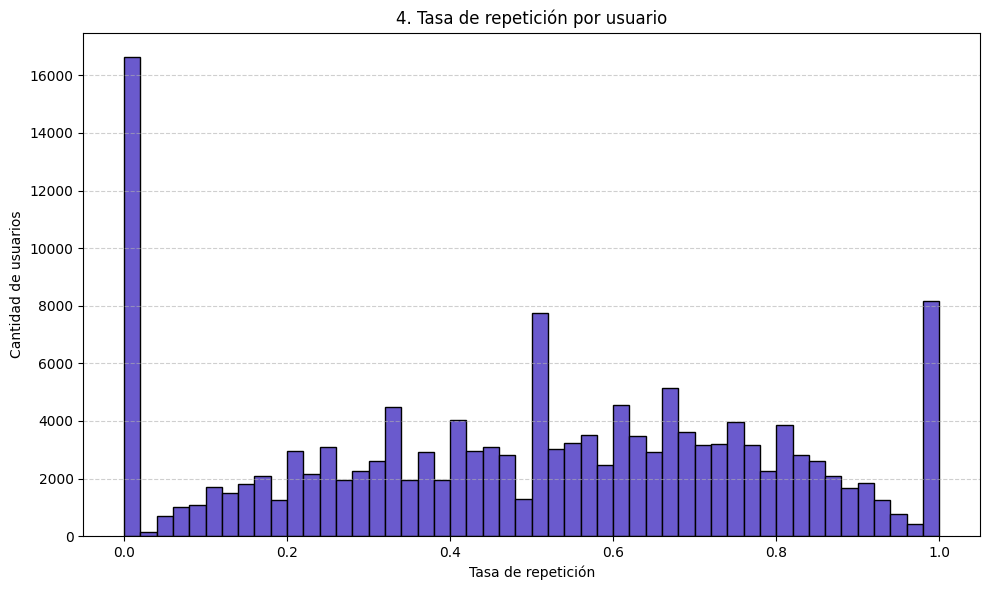

In [88]:
plt.figure(figsize=(10, 6))
plt.hist(reorder_date_per_user['tasa_reorden'], bins=50, color='slateblue', edgecolor='black')
plt.title('4. Tasa de repetición por usuario')
plt.xlabel('Tasa de repetición')
plt.ylabel('Cantidad de usuarios')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Findings: <br>
Analyzing this reorder rate among customers, we can conclude that many customers tend to try new products with each order. However, there is a niche group of loyal customers who consistently repurchase certain products. It may be worthwhile to analyze these customers more deeply as part of a retention or personalization strategy aimed at them.

### [C5] What are the top 20 items that people add to their carts first?

In [89]:
# Filter by add_to_cart_order == 1
first_products = df_order_products_clean[df_order_products_clean['add_to_cart_order'] == 1]

# Count how many times each product was first ordered
top_first = (first_products['product_id'].value_counts().head(20))

# Convert the series to Dataframe
top_first = top_first.reset_index()
top_first.columns = ['product_id', 'veces_primero']

# Add the name of product
top_first = pd.merge(top_first, df_products_clean[['product_id', 'product_name']], on='product_id')

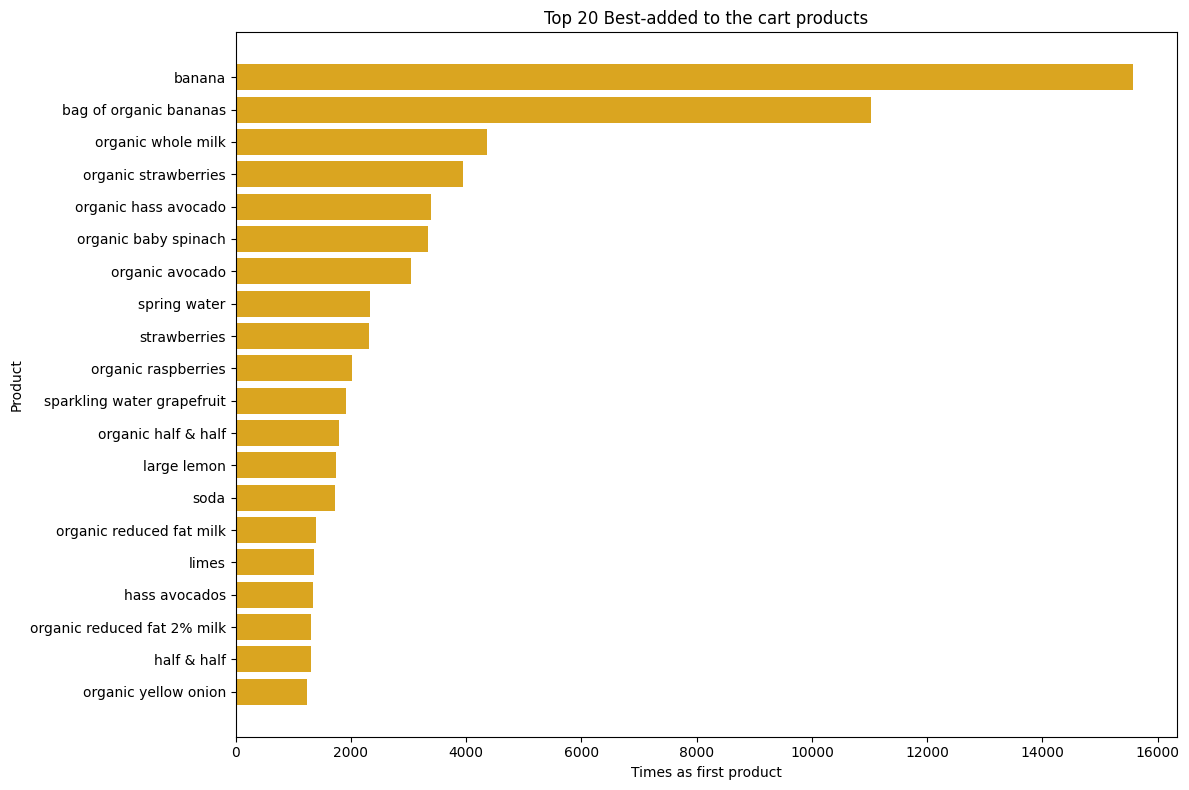

In [90]:
plt.figure(figsize=(12, 8))
plt.barh(top_first['product_name'], top_first['veces_primero'], color='goldenrod')
plt.title('Top 20 Best-added to the cart products')
plt.xlabel('Times as first product')
plt.ylabel('Product')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Conclusion: 

This project provided a deep exploration into consumer behavior patterns on the Instacart platform. By analyzing the five major datasets: orders, products, order_products, aisles, and departments. We successfully navigated real-world data to extract valuable and actionable insights.

Preprocessing Stage: Foundation of the Analysis <br>
<br>
The data cleaning phase was essential and revealed significant challenges. The first crucial step was identifying the correct data separator (semicolon instead of comma). Handling duplicate values was insightful: we found 15 exact duplicates in the orders table, all anomalously grouped on Wednesdays at 2 a.m., which were subsequently removed.

- Product Names: The 1,258 unnamed products (product_name) were not random; all belonged to aisle 100 and department 21 (identified as “missing” or “unknown”). These were correctly imputed as “Unknown” to maintain record integrity.
- Days Since Prior Order: The 28,817 missing values in days_since_prior_order perfectly corresponded to orders where order_number was 1 — confirming that these were new customers placing their first order, a meaningful insight on its own.
- Cart Order: The 836 missing values in add_to_cart_order were associated with exceptionally large orders (over 64 items, the observed maximum). These were imputed with an outlier value (999) for proper handling.

Exploratory Data Analysis: Discovering Key Patterns <br>
Once cleaned, the analysis revealed clear behavioral trends about when and how customers shop: <br>

- Peak Hours: Ordering activity is strongly concentrated between 10:00 a.m. and 4:00 p.m. This trend held steady across both high-demand days (like Saturday) and lower-demand days (like Wednesday).
- Purchase Frequency: A strong bimodal pattern emerged (A4). Two main customer groups were identified: a weekly segment (peaking around 7 days) and a monthly segment (peaking at 30 days).
- Order Size & Customer Loyalty: Most customers place only a few orders (1–4) (B2) and buy a small number of items per order (the peak is around 5 items) (C1). However, there is a “long tail” of highly recurrent customers who make much larger purchases.
- Reorder Behavior: The reorder analysis (C3, C4) revealed polarization — most products and users exhibit low reorder rates (favoring exploration), but there exists a loyal user segment that reorders almost all of their products in every purchase.

Global Insight: The “Anchor Product” and Customer Segmentation <br>
<br>
The most consistent finding across the entire analysis was the dominance of specific products. “Banana” and “Bag of Organic Bananas” were not only the most purchased items (B3) but also the most reordered (C2) and, crucially, the most frequently added first to the cart (C5).
This suggests that these products — along with other fresh organic items like strawberries and avocados — act as “anchor products”: primary intention items that initiate the shopping process.

In Summary: <br>
<br>
Analyzing these five datasets allowed us to identify distinct customer archetypes — weekly vs. monthly, explorers vs. loyalists, small vs. large basket shoppers. For Instacart, this translates into clear strategic opportunities:

- Interface Optimization: Highlighting anchor products (like bananas) at the start of a user session could reduce friction and increase cart conversion.
- Personalized Marketing: Users can be segmented — explorers (low reorder rate) can receive discounts on new products, while loyal customers (high reorder rate) could benefit from “quick reorder” or subscription options for their favorite items.